# Transfer Learning with Three Approaches

**student-ID :** 400109898
**name :** Borna khodabandeh
 
This notebook implements transfer learning using three different approaches: training a Linear classifier with a fixed feature extractor using the `Cross-Entropy Loss`, Fine tune Feature extractor using `Triplet Loss` and then training a Linear classifier on top, and training the whole model in an End-to-End fashion using both the `Triplet Loss` and the `Cross-Entropy Loss`. The code is divided into sections.

## Initial Setup and Dataset Loading

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision.datasets import CIFAR10
from torchvision import datasets

import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using {device} device")

using cuda:0 device


The code loads the CIFAR-10 dataset, filters it to include only `airplane` and `automobile` classes (0 and 1 respectively), and creates training and testing data loaders with a batch size of `256`.

the dataset is small so we do not create a validation set for the task. (tried and saw degraded performance, will provide if needed.)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load dataset
cifar10_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# 'airplane' and 'automobile'
selected_classes = [0, 1]  # 0: airplane, 1: automobile
num_classes = len(selected_classes)
filtered_indices = [i for i in range(len(cifar10_dataset.targets)) if cifar10_dataset.targets[i] in selected_classes]
filtered_train_dataset = torch.utils.data.Subset(cifar10_dataset, filtered_indices)
filtered_test_indices = [i for i in range(len(cifar10_test_dataset.targets)) if cifar10_test_dataset.targets[i] in selected_classes]
filtered_test_dataset = Subset(cifar10_test_dataset, filtered_test_indices)

batch_size = 256
train_loader = DataLoader(filtered_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(filtered_test_dataset, batch_size=batch_size, shuffle=False)

# Check the dataset sizes
print(f"Number of training examples: {len(filtered_train_dataset)}")
print(f"Number of test examples: {len(filtered_test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
Number of training examples: 10000
Number of test examples: 2000


Here, we have a visual representation the dataset, showcasing eight images along with their corresponding labels.

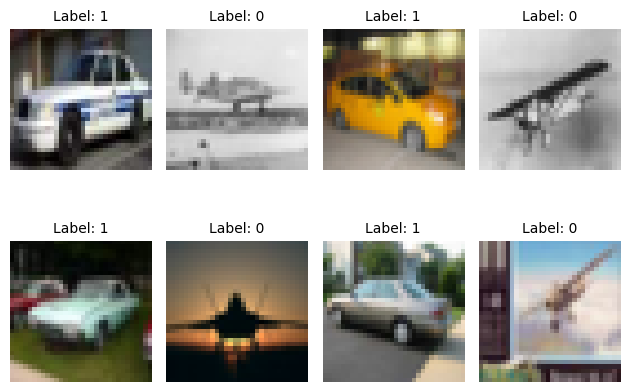

In [ ]:
for img, label in train_loader:
    img = img / 2 + 0.5  # unnormalize
    for i in range(8):
      plt.subplot(2, 4, i + 1)
      npimg = img.numpy()[i, :]
      plt.imshow(np.transpose(npimg, (1, 2, 0)))
      plt.title(f'Label: {label[i].tolist()}', fontsize=10)
      plt.axis('off')
    plt.tight_layout()
    plt.show()
    break

# Transfer learning

## Training a linear classifier, fixed feature extractor

This code utilizes transfer learning with a pre-trained `ResNet-50` model for binary classification. It modifies the fully connected layer, freezes pre-trained parameters, and trains the model for 15 epochs. The training loss is plotted over epochs to visualize the training progress.

In [ ]:
# Load pre-trained ResNet-50 model
model_ce = models.resnet50(weights='DEFAULT')

# Freeze params
for param in model_ce.parameters():
    param.requires_grad = False

num_ftrs = model_ce.fc.in_features
model_ce.fc = nn.Linear(num_ftrs, num_classes)
model_ce = model_ce.to(device)

# Define loss function and optimizer
ce_loss   = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ce.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

### Training the model

epoch 1/20: 100%|██████████| 40/40 [00:04<00:00,  8.72it/s]


Loss: 0.5263, Accuracy: 77.84%


epoch 2/20: 100%|██████████| 40/40 [00:04<00:00,  9.27it/s]


Loss: 0.4108, Accuracy: 84.62%


epoch 3/20: 100%|██████████| 40/40 [00:03<00:00, 10.01it/s]


Loss: 0.3706, Accuracy: 86.04%


epoch 4/20: 100%|██████████| 40/40 [00:04<00:00,  9.58it/s]


Loss: 0.3519, Accuracy: 86.39%


epoch 5/20: 100%|██████████| 40/40 [00:06<00:00,  5.80it/s]


Loss: 0.3425, Accuracy: 86.63%


epoch 6/20: 100%|██████████| 40/40 [00:06<00:00,  6.20it/s]


Loss: 0.3333, Accuracy: 87.14%


epoch 7/20: 100%|██████████| 40/40 [00:07<00:00,  5.50it/s]


Loss: 0.3279, Accuracy: 87.02%


epoch 8/20: 100%|██████████| 40/40 [00:03<00:00, 10.26it/s]


Loss: 0.3198, Accuracy: 86.95%


epoch 9/20: 100%|██████████| 40/40 [00:04<00:00,  8.85it/s]


Loss: 0.3146, Accuracy: 87.36%


epoch 10/20: 100%|██████████| 40/40 [00:04<00:00,  9.39it/s]


Loss: 0.3151, Accuracy: 87.71%


epoch 11/20: 100%|██████████| 40/40 [00:03<00:00, 10.04it/s]


Loss: 0.3170, Accuracy: 87.30%


epoch 12/20: 100%|██████████| 40/40 [00:04<00:00,  9.47it/s]


Loss: 0.3097, Accuracy: 87.81%


epoch 13/20: 100%|██████████| 40/40 [00:04<00:00,  9.13it/s]


Loss: 0.3175, Accuracy: 87.39%


epoch 14/20: 100%|██████████| 40/40 [00:04<00:00,  9.99it/s]


Loss: 0.3042, Accuracy: 87.83%


epoch 15/20: 100%|██████████| 40/40 [00:03<00:00, 10.22it/s]


Loss: 0.3061, Accuracy: 87.69%


epoch 16/20: 100%|██████████| 40/40 [00:04<00:00,  8.41it/s]


Loss: 0.3036, Accuracy: 88.37%


epoch 17/20: 100%|██████████| 40/40 [00:03<00:00, 10.03it/s]


Loss: 0.3118, Accuracy: 87.78%


epoch 18/20: 100%|██████████| 40/40 [00:03<00:00, 10.04it/s]


Loss: 0.3042, Accuracy: 87.54%


epoch 19/20: 100%|██████████| 40/40 [00:04<00:00,  8.33it/s]


Loss: 0.3128, Accuracy: 87.43%


epoch 20/20: 100%|██████████| 40/40 [00:03<00:00, 10.26it/s]


Loss: 0.3254, Accuracy: 87.01%


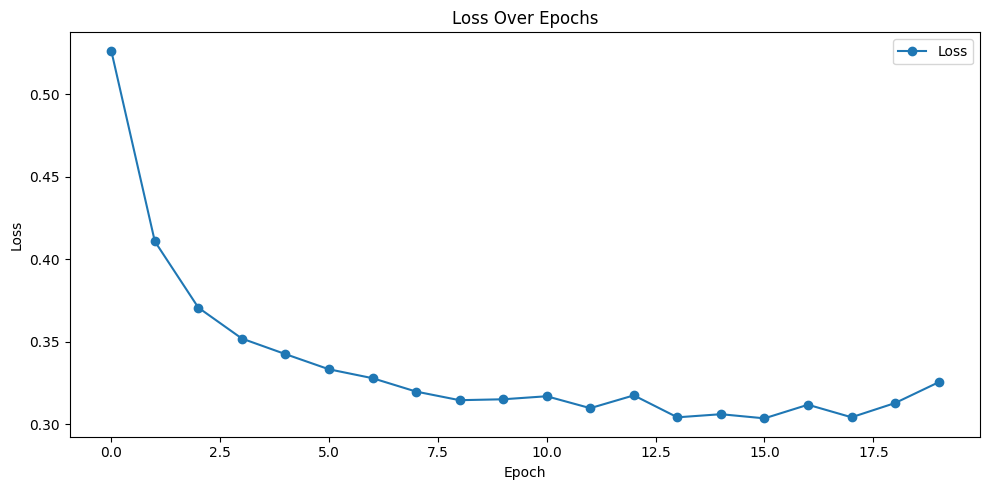

In [ ]:
from tqdm import tqdm

loss_list = []

num_epochs = 15
# Train the model
for epoch in range(num_epochs):
    model_ce.train()
    running_loss = 0.0
    accuracy_list = []

    for inputs, labels in tqdm(train_loader, desc=f'epoch {epoch+1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_ce(inputs)
        loss = ce_loss(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Measure accuracy
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        total = labels.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = sum(accuracy_list) / len(accuracy_list)

    scheduler.step()

    print(f'Loss: {epoch_loss:.4f}, Accuracy: {100*accuracy:.2f}%')
    loss_list.append(epoch_loss)

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

we observe a steadily decreasing loss, showing a good training procedure.

### Testing model accuracy

This part evaluates the accuracy of the linear classifier paired with the `Resnet-50` feature extractor on the test dataset and computes the final accuracy percentage.

In [ ]:
accuracy_list = []

model_ce.eval()

with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model_ce(inputs)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    accuracy_list.append(accuracy)

  accuracy = sum(accuracy_list) / len(accuracy_list)

print(f'\nModel accuracy over test dataset: {100*accuracy:.2f}%')

100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


Model accuracy over test dataset: 85.68%


here we see an overall accuracy of `85.68` on the test set, which is good but not enough for the simple dataset, in the next sections we show greatly improved accuracy by using fine tuning techniques.

# Fine-tuning

In this section, we move on to the fine-tuning phase of our deep learning project. Fine-tuning involves taking the pre-trained model and adapting it to our specific task. 
here we train the feature extractor of a larger model on our smaller, task-specific dataset, by using the `Triplet Loss` to help our model differentiate between `airplanes` and `cars` more. This enables the model to leverage knowledge gained from the original training while tailoring its capabilities to the nuances our task.

## Triplet Loss

here we define a custom `TripletDataset` class for creating datasets suitable for triplet loss training.
by providing an `anchor`, which is the target data, a `positive` sample which is the same class as the `anchor`, and a `negative` sample which is a different class as the `anchor` sample.
the `Triplet Loss` helps us to find similar representations in which distance between the `positive` and `anchor` samples is little, and large between the `negative` and `anchor` samples. creating a Fine-tuned 
feature extractor.

In [ ]:
class TripletDataset(Dataset):
    def __init__(self, root_dir, train, selected_classes, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.cifar10_dataset = datasets.CIFAR10(
            root=self.root_dir,
            train=train,
            download=True,
            transform=transform
        )

        # 'airplane' and 'automobile'
        self.filtered_indices = [i for i in range(len(self.cifar10_dataset.targets)) if self.cifar10_dataset.targets[i] in selected_classes]
        self.filtered_dataset = Subset(self.cifar10_dataset, self.filtered_indices)

    def __getitem__(self, index):
        anchor, anchor_label = self.filtered_dataset[index]

        original_targets = torch.tensor(self.cifar10_dataset.targets)[self.filtered_indices]

        # Select a positive sample
        positive_indices = torch.nonzero(original_targets == anchor_label).squeeze()
        positive_index = np.random.choice(positive_indices.numpy())
        positive, _ = self.filtered_dataset[positive_index]

        # Select a negative sample
        negative_indices = torch.nonzero(original_targets != anchor_label).squeeze()
        negative_index = np.random.choice(negative_indices.numpy())
        negative, _ = self.filtered_dataset[negative_index]

        return anchor, positive, negative, anchor_label

    def __len__(self):
        return len(self.filtered_dataset)


triplet_train_dataset = TripletDataset(
    root_dir='./data',
    train=True,
    selected_classes=selected_classes,
    transform=transform
)
triplet_test_dataset = TripletDataset(
    root_dir='./data',
    train=False,
    selected_classes=selected_classes,
    transform=transform
)

batch_size = 256
triplet_train_loader = DataLoader(triplet_train_dataset, batch_size=batch_size, shuffle=True)
triplet_test_loader = DataLoader(triplet_test_dataset, batch_size=batch_size, shuffle=False)

# Check the dataset sizes
print(f"Number of training examples: {len(filtered_train_dataset)}")
print(f"Number of test examples: {len(filtered_test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
Number of training examples: 10000
Number of test examples: 2000


Here, we have a visual representation of what the triplet loader is doing, showcasing a sample of the anchor, positive sample and negative sample.

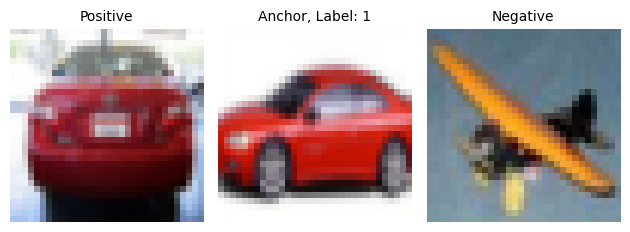

In [ ]:
for (anchor, positive, negative, label) in triplet_train_loader:
    # Unnormalize the images
    anchor = anchor / 2 + 0.5
    positive = positive / 2 + 0.5
    negative = negative / 2 + 0.5

    # Plot Positive
    plt.subplot(1, 3, 1)
    npimg_positive = positive.numpy()[0, :]
    plt.imshow(np.transpose(npimg_positive, (1, 2, 0)))
    plt.title('Positive', fontsize=10)
    plt.axis('off')

    # Plot Anchor
    plt.subplot(1, 3, 2)
    npimg_anchor = anchor.numpy()[0, :]
    plt.imshow(np.transpose(npimg_anchor, (1, 2, 0)))
    plt.title(f'Anchor, Label: {label[0]}', fontsize=10)
    plt.axis('off')

    # Plot Negative
    plt.subplot(1, 3, 3)
    npimg_negative = negative.numpy()[0, :]
    plt.imshow(np.transpose(npimg_negative, (1, 2, 0)))
    plt.title('Negative', fontsize=10)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    break  # Break after the first batch


## Pre-trained ResNet-50 for Triplet Loss

Load the pre-trained ResNet-50 model, remove its last layer, and set up for training using triplet loss. The model's fully connected layer is replaced to adapt to the triplet loss objective.

In [ ]:
# Load pre-trained ResNet-50 model
model_tri = models.resnet50(weights='DEFAULT')

num_ftrs = model_tri.fc.in_features
model_tri.fc = nn.Identity() # removing last layer
model_tri = model_tri.to(device)

# Define loss function and optimizer
triplet_loss = nn.TripletMarginLoss()
optimizer    = torch.optim.Adam(model_tri.parameters(), lr=0.001)
scheduler    = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

### Training the feature extractor

Epoch 1/10: 100%|██████████| 40/40 [02:26<00:00,  3.65s/it]


Loss: 2.0972


Epoch 2/10: 100%|██████████| 40/40 [02:34<00:00,  3.86s/it]


Loss: 0.7233


Epoch 3/10: 100%|██████████| 40/40 [02:29<00:00,  3.74s/it]


Loss: 0.2525


Epoch 4/10: 100%|██████████| 40/40 [02:37<00:00,  3.93s/it]


Loss: 0.1489


Epoch 5/10: 100%|██████████| 40/40 [02:23<00:00,  3.58s/it]


Loss: 0.1181


Epoch 6/10: 100%|██████████| 40/40 [02:42<00:00,  4.06s/it]


Loss: 0.0931


Epoch 7/10: 100%|██████████| 40/40 [02:48<00:00,  4.22s/it]


Loss: 0.0472


Epoch 8/10: 100%|██████████| 40/40 [02:24<00:00,  3.60s/it]


Loss: 0.0350


Epoch 9/10: 100%|██████████| 40/40 [02:21<00:00,  3.53s/it]


Loss: 0.0494


Epoch 10/10: 100%|██████████| 40/40 [02:21<00:00,  3.54s/it]


Loss: 0.0515


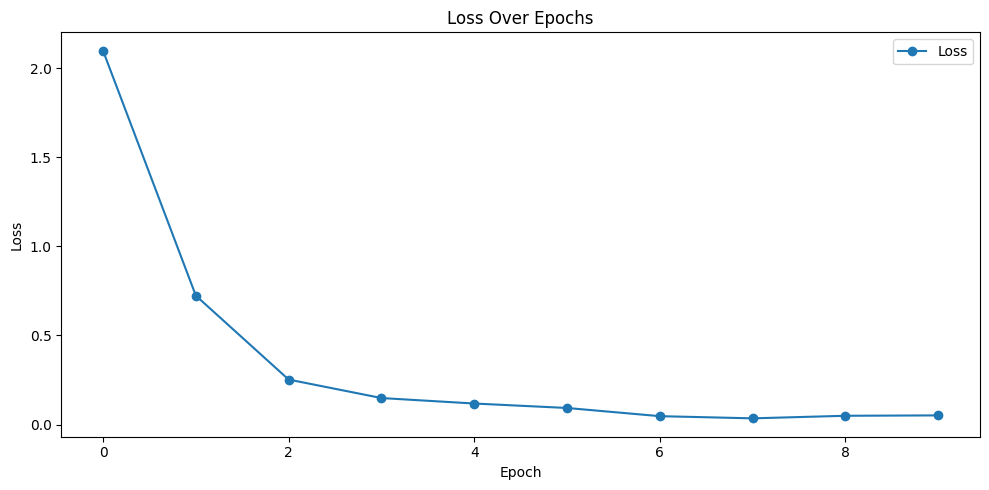

In [ ]:
from tqdm import tqdm

loss_list = []

num_epochs = 10
# Train the model
for epoch in range(num_epochs):
    model_tri.train()
    running_loss = 0.0

    for anchor, positive, negative, _ in tqdm(triplet_train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

        optimizer.zero_grad()

        # Forward pass to get embeddings
        anchor_embedding = model_tri(anchor)
        positive_embedding = model_tri(positive)
        negative_embedding = model_tri(negative)

        loss = triplet_loss(
            anchor_embedding,
            positive_embedding,
            negative_embedding
        )

        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)

    scheduler.step()

    print(f'Loss: {epoch_loss:.4f}')
    loss_list.append(epoch_loss)

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

we observe a steadily decreasing loss, showing a good training procedure.

## Fitting a Linear Classifier

After fine-tuning the feature extractor, the next step is fitting a linear classifier. This entails replacing the final layer, to adapt it for the specific classification task.

In [ ]:
# Freeze params
for param in model_tri.parameters():
    param.requires_grad = False

model_tri.fc = nn.Linear(num_ftrs, num_classes)
model_tri = model_tri.to(device)

# Define loss function and optimizer
optimizer = torch.optim.Adam(model_tri.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

### Training the classifier

epoch 1/10: 100%|██████████| 40/40 [00:04<00:00,  9.55it/s]


Loss: 0.6165, Accuracy: 80.66%


epoch 2/10: 100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


Loss: 0.4321, Accuracy: 99.47%


epoch 3/10: 100%|██████████| 40/40 [00:04<00:00,  8.91it/s]


Loss: 0.3144, Accuracy: 99.33%


epoch 4/10: 100%|██████████| 40/40 [00:04<00:00,  8.38it/s]


Loss: 0.2430, Accuracy: 99.23%


epoch 5/10: 100%|██████████| 40/40 [00:04<00:00,  8.34it/s]


Loss: 0.1870, Accuracy: 99.54%


epoch 6/10: 100%|██████████| 40/40 [00:04<00:00,  8.97it/s]


Loss: 0.1542, Accuracy: 99.50%


epoch 7/10: 100%|██████████| 40/40 [00:04<00:00,  9.52it/s]


Loss: 0.1329, Accuracy: 99.33%


epoch 8/10: 100%|██████████| 40/40 [00:04<00:00,  8.34it/s]


Loss: 0.1128, Accuracy: 99.46%


epoch 9/10: 100%|██████████| 40/40 [00:04<00:00,  8.76it/s]


Loss: 0.0970, Accuracy: 99.58%


epoch 10/10: 100%|██████████| 40/40 [00:04<00:00,  9.50it/s]


Loss: 0.0861, Accuracy: 99.52%


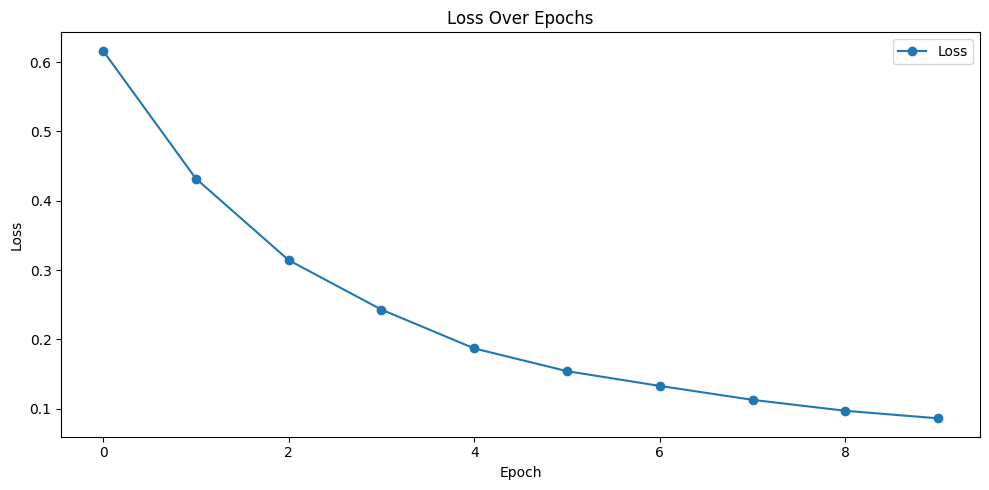

In [ ]:
from tqdm import tqdm

loss_list = []

num_epochs = 15
# Train the model
for epoch in range(num_epochs):
    model_tri.train()
    running_loss = 0.0
    accuracy_list = []

    for inputs, labels in tqdm(train_loader, desc=f'epoch {epoch+1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_tri(inputs)
        loss = ce_loss(outputs, labels)
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Measure accuracy
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        total = labels.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = sum(accuracy_list) / len(accuracy_list)

    scheduler.step()

    print(f'Loss: {epoch_loss:.4f}, Accuracy: {100*accuracy:.2f}%')
    loss_list.append(epoch_loss)

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

we observe a steadily decreasing loss, showing a good training procedure.

### Testing model accuracy

This part evaluates the accuracy of the model, made by separately fine tuning the feature extractor of our pre-trained model and fitting a linear classifier onto it.

In [ ]:
accuracy_list = []

model_tri.eval()

with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model_tri(inputs)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    accuracy_list.append(accuracy)

  accuracy = sum(accuracy_list) / len(accuracy_list)

print(f'\nModel accuracy over test dataset: {100*accuracy:.2f}%')

100%|██████████| 8/8 [00:00<00:00,  8.55it/s]


Model accuracy over test dataset: 97.54%


we observe an overall accuracy of `97.54%` over the test dataset, showing greatly improved performance from the model without fine tuning, showing the significance of fine tuning our pre-trained model to our specific task

## End-to-End Approach

The end-to-end approach involves training a single integrated model, training both the feature extractor with the `Triplet Loss` and the Linear classifier with the `Cross Entropy Loss` at the same time to without separating different stages or components, potentially improving model effectiveness.

here we have defined the total loss the be the sum of both the losses using:

$$
L_{total} = L_{CE} + L_{triplet}
$$

In [ ]:
class EndToEndModel(nn.Module):
    def __init__(self, num_classes):
        super(EndToEndModel, self).__init__()

        # Create feature extractor
        self.feature_extractor = models.resnet50(weights='DEFAULT')
        num_ftrs = self.feature_extractor.fc.in_features
        self.feature_extractor.fc = nn.Identity()

        self.classifier = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        features = self.feature_extractor(x)
        predictions = self.classifier(features)

        return features, predictions

model_e2e = EndToEndModel(num_classes)
model_e2e = model_e2e.to(device)

# Define loss function and optimizer
optimizer    = torch.optim.Adam(model_e2e.parameters(), lr=0.001)
scheduler    = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

### Training the whole model

Epoch 1/10: 100%|██████████| 40/40 [02:20<00:00,  3.51s/it]


Loss: 2.6041, Accuracy: 97.12%


Epoch 2/10: 100%|██████████| 40/40 [02:18<00:00,  3.45s/it]


Loss: 0.8257, Accuracy: 97.12%


Epoch 3/10: 100%|██████████| 40/40 [02:20<00:00,  3.52s/it]


Loss: 0.2985, Accuracy: 97.12%


Epoch 4/10: 100%|██████████| 40/40 [02:16<00:00,  3.41s/it]


Loss: 0.2102, Accuracy: 97.12%


Epoch 5/10: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]


Loss: 0.0885, Accuracy: 97.12%


Epoch 6/10: 100%|██████████| 40/40 [02:20<00:00,  3.52s/it]


Loss: 0.0671, Accuracy: 97.12%


Epoch 7/10: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]


Loss: 0.0338, Accuracy: 97.12%


Epoch 8/10: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]


Loss: 0.0364, Accuracy: 97.12%


Epoch 9/10: 100%|██████████| 40/40 [02:20<00:00,  3.52s/it]


Loss: 0.0798, Accuracy: 97.12%


Epoch 10/10: 100%|██████████| 40/40 [02:17<00:00,  3.43s/it]


Loss: 0.1659, Accuracy: 97.12%


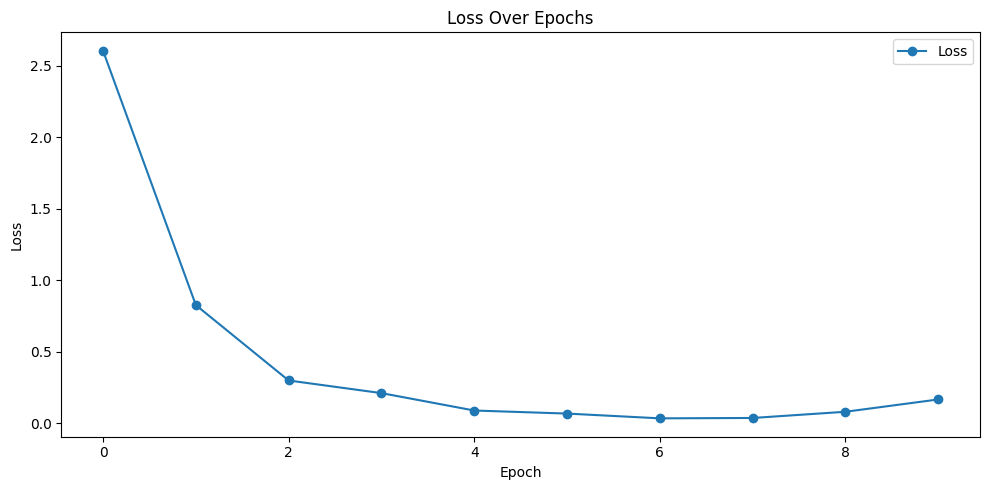

In [ ]:
from tqdm import tqdm

loss_list = []

num_epochs = 10
# Train the model
for epoch in range(num_epochs):
    model_e2e.train()
    running_loss = 0.0
    accuracy_list = []

    for anchor, positive, negative, label in tqdm(triplet_train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        anchor, positive, negative, label = anchor.to(device), positive.to(device), negative.to(device), label.to(device)

        optimizer.zero_grad()

        # Forward pass to get embeddings
        anchor_embedding, pred = model_e2e(anchor)
        positive_embedding, _  = model_e2e(positive)
        negative_embedding, _  = model_e2e(negative)

        loss_tri = triplet_loss(
            anchor_embedding,
            positive_embedding,
            negative_embedding
        )

        loss_ce = ce_loss(pred, label)

        loss = loss_tri + loss_ce

        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

         # Measure accuracy
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == label).sum().item()
        total = label.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    accuracy = sum(accuracy_list) / len(accuracy_list)

    scheduler.step()

    print(f'Loss: {epoch_loss:.4f}, Accuracy: {100*accuracy:.2f}%')
    loss_list.append(epoch_loss)

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

we observe a steadily decreasing loss, showing a good training procedure.

### Testing model accuracy

This part evaluates the accuracy of the final End-to-End model on the test dataset and computes the final accuracy percentage.

In [ ]:
accuracy_list = []

model_e2e.eval()

with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    _, outputs = model_e2e(inputs)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    accuracy_list.append(accuracy)

  accuracy = sum(accuracy_list) / len(accuracy_list)

print(f'\nModel accuracy over test dataset: {100*accuracy:.2f}%')

100%|██████████| 8/8 [00:01<00:00,  7.91it/s]


Model accuracy over test dataset: 98.13%


here we observe an overall accuracy of `98.13%` which is the highest among the approaches we used, suggesting that the end-to-end approach was the best.